In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

<font size="3"> $$ z_{i} = y_{i}*f(x_{i}) = y_{i}(w^{T}x_{i}+b)$$</font>

<font size="4">Logistic loss:</font>

<font size="3"> $$ L(z_{i}) = log(1+e^{-z_{i}}) $$</font>

<font size="4">Derivative of logistic loss:</font>

<font size="3"> $$ {L_{z}}' = \frac{\partial L}{\partial w }=\frac{-yXe^{-z}}{1+e^{-z}} $$</font>

In [2]:
def add_intercept(X):
    
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [3]:
iris = datasets.load_iris()

y = (iris.target != 0) * -1
y[y ==0] = 1
iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_target = pd.DataFrame(data = y, columns = ["target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)

In [4]:
#training and testing set size
train_size=int(0.75*iris_df.shape[0])
test_size=int(0.25*iris_df.shape[0])

print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

#Getting features from dataset
Data=iris_df.sample(frac=1)
X=Data.iloc[:,[0, 1]].values
y=Data.iloc[:,2].values

#add intercept
X = add_intercept(X)
#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

Training set size : 112
Testing set size : 37


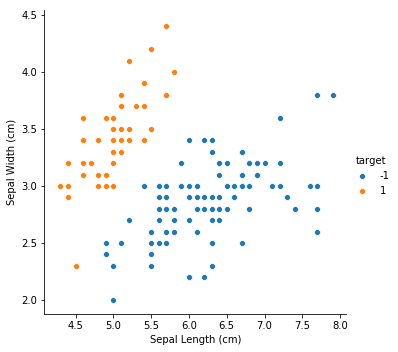

In [5]:
sns.pairplot(x_vars=["Sepal Length (cm)"], y_vars=["Sepal Width (cm)"], data=iris_df, hue="target", height=5)
plt.show()

In [6]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, num_iter=10000, w0=0.5, verbose=True):
        
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self.w0 = w0
        self.m = y.shape[0]
    
    def sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))
    
    def prediction(self, w, Data):
        
        pred = []
        z = np.dot(Data,w)
        a = self.sigmoid(z)
        
        for i in range(0,len(a)):
            if (a[i] > self.w0): 
                pred.append(1)
            elif (a[i] <= self.w0):
                pred.append(-1)
                
        return pred

    def fit(self, X, y):
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            val = -np.multiply(y,z)
            f = -np.multiply(y,np.exp(val))/(1+np.exp(val))
            gradient = np.dot(X.T,f.T)
            self.theta -= self.lr * gradient.T
            
            if (self.verbose) and (i % 100) == 0:
                loss = np.sum(np.log(1+np.exp(val)))
                y_pred = self.prediction(self.theta, X)
                print('loss =',round(loss,3),' Training Accuracy',round(np.mean(y== y_pred)*100,1))
                
    def get_theha(self):
        
        return self.theta

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

loss = 77.632  Training Accuracy 69.6
loss = 6.069  Training Accuracy 99.1
loss = 5.603  Training Accuracy 99.1
loss = 5.293  Training Accuracy 99.1
loss = 5.066  Training Accuracy 99.1
loss = 4.889  Training Accuracy 99.1
loss = 4.744  Training Accuracy 99.1
loss = 4.621  Training Accuracy 99.1
loss = 4.513  Training Accuracy 99.1
loss = 4.417  Training Accuracy 99.1
loss = 4.329  Training Accuracy 99.1
loss = 4.249  Training Accuracy 99.1
loss = 4.174  Training Accuracy 99.1
loss = 4.104  Training Accuracy 99.1
loss = 4.037  Training Accuracy 99.1
loss = 3.974  Training Accuracy 99.1
loss = 3.914  Training Accuracy 99.1
loss = 3.856  Training Accuracy 99.1
loss = 3.801  Training Accuracy 99.1
loss = 3.747  Training Accuracy 99.1
loss = 3.695  Training Accuracy 99.1
loss = 3.645  Training Accuracy 99.1
loss = 3.596  Training Accuracy 99.1
loss = 3.549  Training Accuracy 99.1
loss = 3.503  Training Accuracy 99.1
loss = 3.458  Training Accuracy 99.1
loss = 3.415  Training Accuracy 99.1


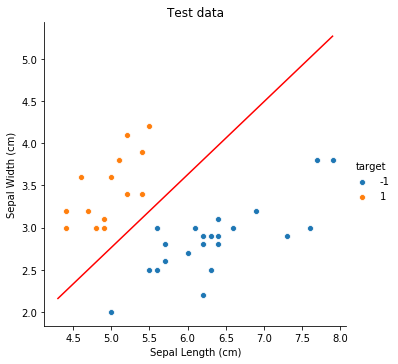

Test accuracy score = 1.0


In [8]:
w = logreg.get_theha()

sns.pairplot(x_vars=["Sepal Length (cm)"], y_vars=["Sepal Width (cm)"], data=Data.iloc[train_size:,:],
                                                                                        hue="target", height=5)
domain =  np.linspace(iris_df['Sepal Length (cm)'].min(),iris_df['Sepal Length (cm)'].max(),2)
h_x = -(w[1]/w[2])*domain - (w[0]/w[2])
plt.plot(domain,h_x,color='red')
plt.title('Test data')
plt.show()
print('Test accuracy score =', np.mean(logreg.prediction(logreg.get_theha(),X_test)==y_test))

## Pros and Cons of Naive Bayes

# Pros:

    1) Logistic Regression performs well when the dataset is linearly separable.
    
    2) Doesn’t require too many computational resources.
    
    3) It’s highly interpretable.
    
    4) Doesn’t require any tuning.
    
# Cons:

    1) Can’t solve non-linear problems with logistic regression since it’s decision surface is linear.
    
    2) Not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.